In [1]:
import numpy as np
from PIL import Image, ImageDraw
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class SyntheticXRayGenerator(Sequence):
    def __init__(self, batch_size, image_size, num_samples):
        self.batch_size = batch_size
        self.image_size = image_size
        self.num_samples = num_samples
        self.classes = ['normal', 'tb', 'cancer']

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, idx):
        batch_x = []
        batch_y = []
        for _ in range(self.batch_size):
            image, label = self.generate_synthetic_image()
            batch_x.append(image)
            batch_y.append(label)
        
        batch_x = np.array(batch_x).astype('float32') / 255.0
        batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=len(self.classes))
        return batch_x, batch_y

    def generate_synthetic_image(self):
        img = Image.new('L', self.image_size, color=0)  # Create a blank image
        draw = ImageDraw.Draw(img)

        label = np.random.choice(len(self.classes))
        if self.classes[label] == 'normal':
            # Simulate a normal x-ray
            draw.ellipse((30, 30, 70, 70), outline=128, width=3)  # Draw lungs
        elif self.classes[label] == 'tb':
            # Simulate TB with additional markings
            draw.ellipse((30, 30, 70, 70), outline=128, width=3)
            draw.line((40, 40, 60, 60), fill=255, width=2)  # TB indication
        elif self.classes[label] == 'cancer':
            # Simulate cancer with a mass
            draw.ellipse((30, 30, 70, 70), outline=128, width=3)
            draw.ellipse((50, 50, 60, 60), fill=255)  # Cancer indication

        img = img.resize(self.image_size)
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
        return img_array, label


Epoch 1/10


d:\Projects\Learn\ml\nndl\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/32 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2812 - loss: 1.1040

d:\Projects\Learn\ml\nndl\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.8083 - loss: 0.4786 - val_accuracy: 1.0000 - val_loss: 4.8535e-07
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 1.0000 - loss: 2.2826e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy:

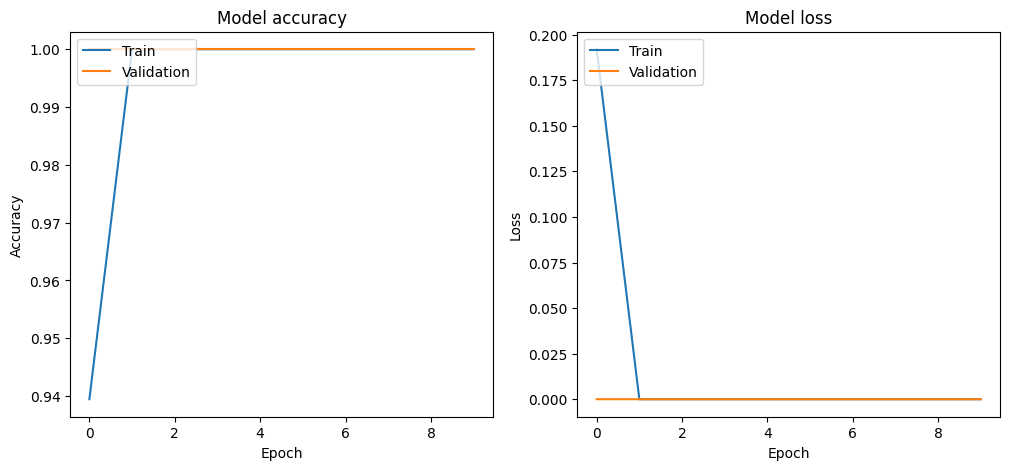

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        11
          tb       1.00      1.00      1.00        12
      cancer       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



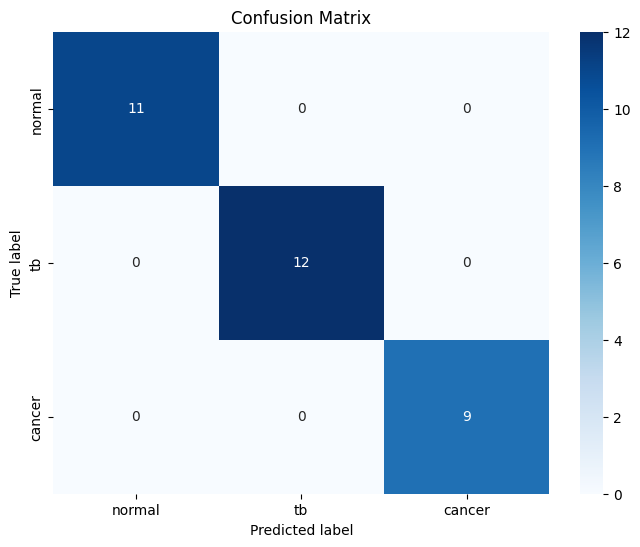

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Parameters
batch_size = 32
image_size = (128, 128)
num_samples = 1000
num_validation_samples = 200

# Create the generators
train_generator = SyntheticXRayGenerator(batch_size, image_size, num_samples)
val_generator = SyntheticXRayGenerator(batch_size, image_size, num_validation_samples)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generator
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plotting the training history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

plot_history(history)

# Evaluate the model on the validation set
val_x, val_y = val_generator[0]
pred_y = model.predict(val_x)
pred_y_classes = np.argmax(pred_y, axis=1)
true_y_classes = np.argmax(val_y, axis=1)

# Classification report
report = classification_report(true_y_classes, pred_y_classes, target_names=val_generator.classes)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(true_y_classes, pred_y_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.classes, yticklabels=val_generator.classes)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
